In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt  


In [2]:
df=pd.read_csv('../data/Churn_Modelling.csv')

In [3]:
X=df.drop('Exited',axis=1)
Y=df['Exited']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [4]:
X_train.shape


(8000, 13)

In [5]:
Y_train.shape

(8000,)

In [6]:
X_test.shape


(2000, 13)

In [7]:
Y_test.shape

(2000,)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        8000 non-null   int64  
 1   CustomerId       8000 non-null   int64  
 2   Surname          8000 non-null   object 
 3   CreditScore      8000 non-null   int64  
 4   Geography        8000 non-null   object 
 5   Gender           8000 non-null   object 
 6   Age              8000 non-null   int64  
 7   Tenure           8000 non-null   int64  
 8   Balance          8000 non-null   float64
 9   NumOfProducts    8000 non-null   int64  
 10  HasCrCard        8000 non-null   int64  
 11  IsActiveMember   8000 non-null   int64  
 12  EstimatedSalary  8000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 875.0+ KB


In [9]:
X_train.isnull().sum()
X_test.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [10]:
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,9255,15601116,P'an,686,France,Male,32,6,0.00,2,1,1,179093.26
1561,1562,15766374,Leak,632,Germany,Male,42,4,119624.60,2,1,1,195978.86
1670,1671,15716994,Green,559,Spain,Male,24,3,114739.92,1,1,0,85891.02
6087,6088,15730759,Chukwudi,561,France,Female,27,9,135637.00,1,1,0,153080.40
6669,6670,15797900,Chinomso,517,France,Male,56,9,142147.32,1,0,0,39488.04


In [11]:
X_test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,6253,15687492,Anderson,596,Germany,Male,32,3,96709.07,2,0,0,41788.37
4684,4685,15736963,Herring,623,France,Male,43,1,0.00,2,1,1,146379.30
1731,1732,15721730,Amechi,601,Spain,Female,44,4,0.00,2,1,0,58561.31
4742,4743,15762134,Liang,506,Germany,Male,59,8,119152.10,2,1,1,170679.74
4521,4522,15648898,Chuang,560,Spain,Female,27,7,124995.98,1,1,1,114669.79


In [12]:
X_test.drop('RowNumber',axis=1, inplace=True)
X_train.drop('RowNumber',axis=1, inplace=True)


In [13]:
X_test.drop('CustomerId',axis=1, inplace=True)
X_train.drop('CustomerId',axis=1, inplace=True)

In [14]:
X_train_numerical=X_train.select_dtypes(exclude=["bool_","object_"])
X_train_numerical.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,32,6,0.00,2,1,1,179093.26
1561,632,42,4,119624.60,2,1,1,195978.86
1670,559,24,3,114739.92,1,1,0,85891.02
6087,561,27,9,135637.00,1,1,0,153080.40
6669,517,56,9,142147.32,1,0,0,39488.04


In [15]:
correlation=X_train.corr().abs()
correlation_data=(correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool_)).stack().sort_values(ascending=False))
correlation_data

Balance         NumOfProducts      0.297601
Age             IsActiveMember     0.088123
                NumOfProducts      0.033875
CreditScore     IsActiveMember     0.028217
Age             Balance            0.027782
Tenure          IsActiveMember     0.023162
Balance         IsActiveMember     0.022086
Tenure          EstimatedSalary    0.022071
Age             HasCrCard          0.020440
Tenure          HasCrCard          0.020439
NumOfProducts   IsActiveMember     0.019543
CreditScore     NumOfProducts      0.019402
Tenure          NumOfProducts      0.018448
Balance         HasCrCard          0.015655
NumOfProducts   EstimatedSalary    0.013162
CreditScore     HasCrCard          0.013145
HasCrCard       EstimatedSalary    0.012799
Balance         EstimatedSalary    0.011984
HasCrCard       IsActiveMember     0.011913
Tenure          Balance            0.011748
IsActiveMember  EstimatedSalary    0.009852
Age             Tenure             0.008788
CreditScore     Tenure          

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>, <AxesSubplot:>]],
      dtype=object)

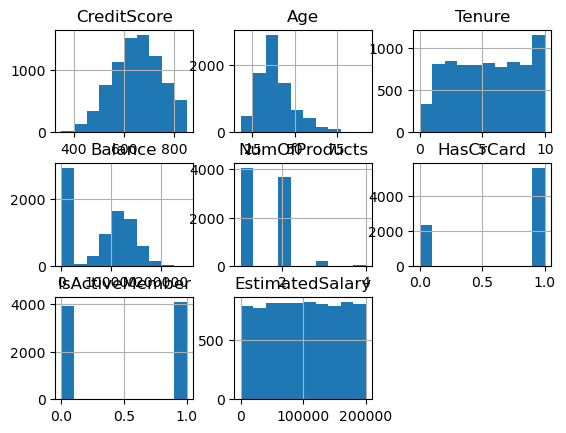

In [16]:
X_train.hist()


In [17]:
X_train_cat=X_train.select_dtypes(include=["bool_","object_"])

In [18]:
X_train_cat

,Surname,Geography,Gender
9254,P'an,France,Male
1561,Leak,Germany,Male
1670,Green,Spain,Male
6087,Chukwudi,France,Female
6669,Chinomso,France,Male
...,...,...,...
5734,Henderson,France,Male
5191,Chukwualuka,France,Female
5390,Macrossan,France,Female
860,McGregor,France,Male


c:\Users\stuti\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


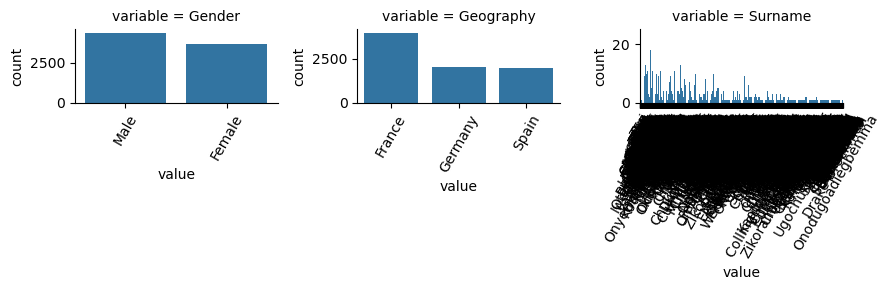

In [19]:
n1=pd.melt(X_train, value_vars=sorted(X_train_cat))
n2=sns.FacetGrid(n1, col='variable', col_wrap=3,sharex=False,sharey=False)
plt.xticks(rotation='vertical')
n2=n2.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in n2.axes.flat]
n2.fig.tight_layout()
plt.show()

In [20]:
X_test.drop('Surname',axis=1, inplace=True)
X_train.drop('Surname',axis=1, inplace=True)

<AxesSubplot:>

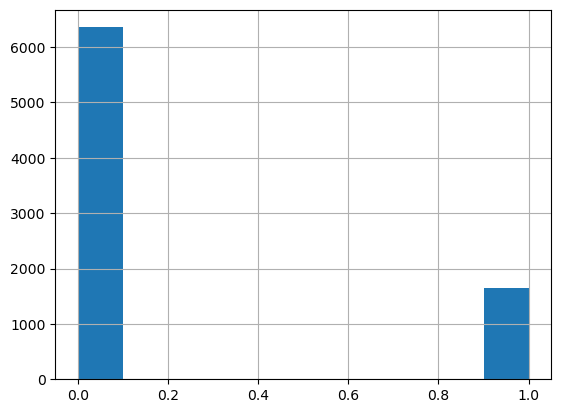

In [21]:
Y_train.hist()

In [22]:
exited=Y_train==1
exited=Y_train[exited]
exited

1670    1
6087    1
6669    1
5933    1
5866    1
       ..
4555    1
769     1
1685    1
5390    1
860     1
Name: Exited, Length: 1644, dtype: int64

In [23]:
val=(exited.shape[0]/Y_train.shape[0])*100
val

20.549999999999997

In [24]:
from sklearn import preprocessing
geography_map = {'France': 0, 'Spain': 1, 'Germany': 2}
gender_map = {'Female': 0, 'Male': 1}
X_train['Gender'] = X_train['Gender'].map(gender_map)
X_train['Geography'] = X_train['Geography'].map(geography_map)
print(X_train.dtypes)


CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


In [25]:
geography_map = {'France': 0, 'Spain': 1, 'Germany': 2}
gender_map = {'Female': 0, 'Male': 1}

X_test['Gender'] = X_test['Gender'].map(gender_map)
X_test['Geography'] = X_test['Geography'].map(geography_map)

print(X_test.dtypes)


CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


In [26]:
Y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [27]:
scaler=preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.35649971, -0.90598864,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  1.50315516,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  0.29858326,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.90598864, -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.90598864,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  1.50315516,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [28]:
scaler=preprocessing.StandardScaler()
X_test=scaler.fit_transform(X_test)
X_test

array([[-0.51250172,  1.51709959,  0.90911166, ..., -1.57810057,
        -1.0502616 , -0.99096946],
       [-0.2360466 , -0.88908533,  0.90911166, ...,  0.63367318,
         0.95214374,  0.8293793 ],
       [-0.46130633,  0.31400713, -1.09997489, ...,  0.63367318,
        -1.0502616 , -0.69904548],
       ...,
       [ 0.85953481, -0.88908533, -1.09997489, ...,  0.63367318,
        -1.0502616 , -1.13742992],
       [ 0.47044982, -0.88908533,  0.90911166, ...,  0.63367318,
        -1.0502616 , -0.38237688],
       [-0.18485121,  1.51709959,  0.90911166, ...,  0.63367318,
         0.95214374,  0.15573964]])

In [29]:
Y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [30]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
Y_train_array = Y_train.to_numpy() 

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)

skfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [31]:
#RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,Y_train)
for fold, (training, testing) in enumerate(skfolds.split(X_train, Y_train_array), 1):
    print(f"\nFold {fold}")
    print("Training set shape:", X_train[training].shape)
    print("Testing set shape:", X_train[testing].shape) 
    print("Y_train[training] shape:", Y_train_array[training].shape)
    print("Y_train[testing] shape:", Y_train_array[testing].shape)

    clone_rfc = clone(rfc)
    x1 = X_train[training]
    y1 = Y_train_array[training]
    x2 = X_train[testing]
    y2 = Y_train_array[testing]
    
    print("y1 shape:", y1.shape)
    print("y2 shape:", y2.shape)
    
    clone_rfc.fit(x1, y1)
    pred = clone_rfc.predict(x2)
    num_correct = np.sum(pred == y2)
    accuracy = num_correct / len(pred)
    print(f"Results for fold {fold}: {accuracy:.4f}")


Fold 1
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 1: 0.8612

Fold 2
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 2: 0.8700

Fold 3
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 3: 0.8512

Fold 4
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 4: 0.8675

Fold 5
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 5: 0.8488

Fold 6
Training set shape: (7

In [32]:
#Logistic Regression
log=LogisticRegression(random_state=42)
log.fit(X_train,Y_train)
for fold, (training, testing) in enumerate(skfolds.split(X_train, Y_train_array), 1):
    print(f"\nFold {fold}")
    print("Training set shape:", X_train[training].shape)
    print("Testing set shape:", X_train[testing].shape) 
    print("Y_train[training] shape:", Y_train_array[training].shape)
    print("Y_train[testing] shape:", Y_train_array[testing].shape)

    clone_log = clone(log)
    x1 = X_train[training]
    y1 = Y_train_array[training]
    x2 = X_train[testing]
    y2 = Y_train_array[testing]
    
    print("y1 shape:", y1.shape)
    print("y2 shape:", y2.shape)
    
    clone_log.fit(x1, y1)
    pred = clone_log.predict(x2)
    num_correct = np.sum(pred == y2)
    accuracy = num_correct / len(pred)
    print(f"Results for fold {fold}: {accuracy:.4f}")


Fold 1
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 1: 0.8100

Fold 2
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 2: 0.7987

Fold 3
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 3: 0.7975

Fold 4
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 4: 0.8150

Fold 5
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 5: 0.8137

Fold 6
Training set shape: (7

In [33]:
#Gradient Boosting Classifier
gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, Y_train)
for fold, (training, testing) in enumerate(skfolds.split(X_train, Y_train_array), 1):
    print(f"\nFold {fold}")
    print("Training set shape:", X_train[training].shape)
    print("Testing set shape:", X_train[testing].shape) 
    print("Y_train[training] shape:", Y_train_array[training].shape)
    print("Y_train[testing] shape:", Y_train_array[testing].shape)

    clone_gbc = clone(gbc)
    x1 = X_train[training]
    y1 = Y_train_array[training]
    x2 = X_train[testing]
    y2 = Y_train_array[testing]
    
    print("y1 shape:", y1.shape)
    print("y2 shape:", y2.shape)
    
    clone_gbc.fit(x1, y1)
    pred = clone_gbc.predict(x2)
    num_correct = np.sum(pred == y2)
    accuracy = num_correct / len(pred)
    print(f"Results for fold {fold}: {accuracy:.4f}")


Fold 1
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 1: 0.8675

Fold 2
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 2: 0.8675

Fold 3
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 3: 0.8575

Fold 4
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 4: 0.8700

Fold 5
Training set shape: (7200, 10)
Testing set shape: (800, 10)
Y_train[training] shape: (7200,)
Y_train[testing] shape: (800,)
y1 shape: (7200,)
y2 shape: (800,)
Results for fold 5: 0.8462

Fold 6
Training set shape: (7

In [34]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(gbc,X_train,Y_train,cv=10)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,y_pred)

array([[6131,  225],
       [ 873,  771]], dtype=int64)

In [35]:
from sklearn.metrics import precision_score, recall_score
precision=precision_score(Y_train,y_pred)
recall=recall_score(Y_train,y_pred)

In [36]:
print("Precision: ",precision)
print("Recall: ",recall)

Precision:  0.7740963855421686
Recall:  0.46897810218978103


In [37]:
y_scores=cross_val_predict(gbc,X_train,Y_train,cv=10,method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(Y_train,y_scores)

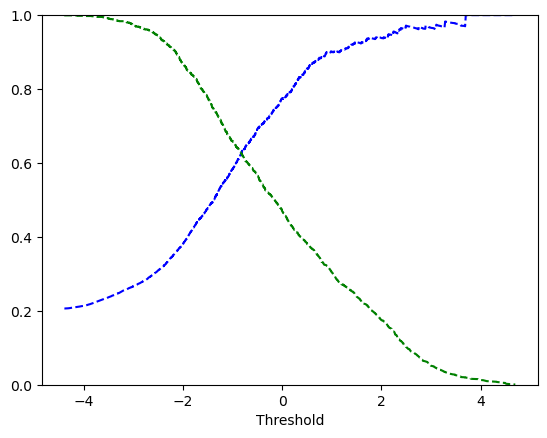

In [38]:
def plotting(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
 
    plt.ylim([0,1])
plotting(precisions,recalls,thresholds)
plt.show()

In [39]:
print(y_scores)

[-4.14518772 -2.0711514  -2.27407496 ...  0.4988685  -0.50264466
 -0.03180387]


In [40]:
y_new_score=(y_scores>-0.8)
print("New precision: ",precision_score(Y_train,y_new_score))
print("New Recall: ",recall_score(Y_train,y_new_score))

New precision:  0.6354556803995006
New Recall:  0.6192214111922141


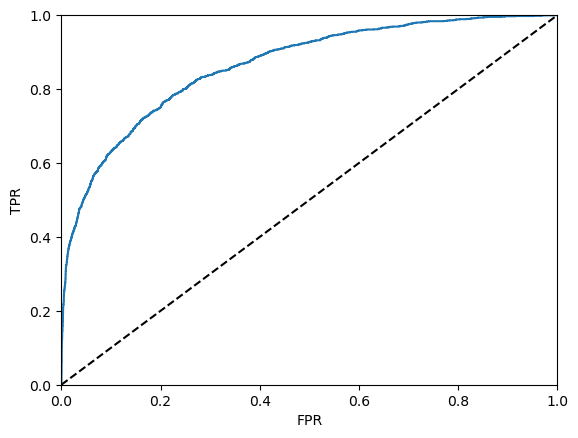

In [41]:
from sklearn.metrics import roc_curve
false,true,thresholds=roc_curve(Y_train,y_scores)
def roc(false,true,label=None):
    plt.plot(false,true)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("FPR")
    plt.ylabel('TPR')
roc(false,true)
plt.show()

In [43]:

import joblib
joblib.dump(gbc, '../saved_models/Gradient_Boosting_Classifier.joblib')
joblib.dump(scaler, '../saved_models/scaler.joblib')

['../saved_models/scaler.joblib']